# QBS 108 Assignment II

### Justin Lin

Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

- Read in the data

In [2]:
kmeans_data = pd.read_csv('kmeans.csv')

knn_train_data = pd.read_csv('knn_train.csv')

knn_val_data = pd.read_csv('knn_val.csv')

knn_test_data = pd.read_csv('knn_test.csv')

## 1. K-Means Clustering

1)

a) Choose a suitable type of plot and visualize the data.

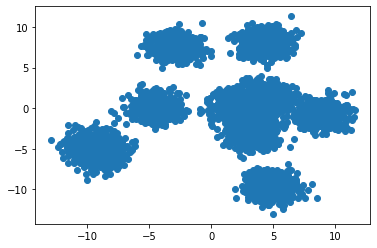

In [3]:
plt.scatter(kmeans_data['X1'], kmeans_data['X2'])

b) From your plot, how many clusters, k, would you estimate are represented in the dataset?

I estimate about 8 clusters are represented in the dataset.

2)

a) Using the k-Means algorithm, implement a clustering model.

In [4]:
kmeans_model = KMeans(n_clusters = 8)

b) Train the clustering model on several reasonable values of k, taking into account your visual inspection from 1b. Plot the Bayesian information criterion (BIC) and Akaike information criterion (AIC) for each value of k.

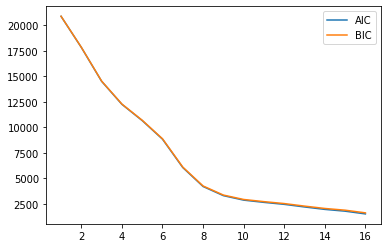

In [5]:
k = range(1,17)
AIC = []
BIC = []
for i in k:
    kmeans_model = KMeans(n_clusters=i)
    kmeans_model.fit(kmeans_data)
    sse = kmeans_model.inertia_
    n = len(kmeans_data)
    aic = n*np.log(sse/n)+ 2*i
    bic = n*np.log(sse/n) + i*np.log(n)
    AIC.append(aic)
    BIC.append(bic)
plt.plot(k, AIC, label='AIC')
plt.plot(k, BIC, label='BIC')
plt.legend()

c) Which value is optimal? How does it compare to your visual inspection?

The optimal value is 8 clusters because the AIC is lowest at k = 8 and the "elbow" method shows that 8 is the optimal value. From my visual inspection, I estimated 8 clusters.

## 2. K-Nearest Neighbor Classification

1) 

a) Train an implementation of the k-Nearest Neighbors algorithm on the training dataset of your choice of k's. Note that k here refers to the number of neighbors, not clusters.

In [6]:
knn_train_data.head()

,X1,X2,y
0,-8.349319,-5.440823,0
1,-3.346695,0.774142,1
2,3.188065,1.406896,7
3,-4.849551,-1.253043,1
4,4.971391,1.022228,7


In [7]:
x_train = knn_train_data.drop('y', axis = 1)
y_train = knn_train_data['y']

for i in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors = i)
    knn_clf.fit(x_train, y_train)

b) Report the classification accuracy of this model on the validation set for different values for k. Plot these accuracies against k and report the optimal value for k.

In [8]:
knn_val_data.head()

,X1,X2,y
0,2.778149,-4.603808,5
1,9.931873,1.835772,4
2,-7.556834,-5.323416,0
3,10.163880,0.622421,4
4,-8.041507,-5.948700,0


The highest accuracy is 0.9225
The optimal k is 17


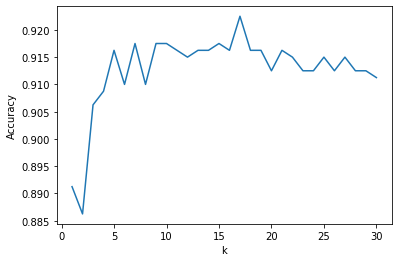

In [9]:
x_val = knn_val_data.drop('y', axis = 1)
y_val = knn_val_data['y']

accuracy = []
n_neighbors = range(1,31)
for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train ,y_train)
    y_pred = knn.predict(x_val)
    acc = accuracy_score(y_val, y_pred)
    accuracy.append(acc)
plt.plot(n_neighbors, accuracy)
plt.xlabel('k')
plt.ylabel('Accuracy')
print('The highest accuracy is', max(accuracy))
print('The optimal k is', n_neighbors[np.argmax(accuracy)])

c) Report the classification accuracy of this model on the data in knn_test.csv using the optimal value of k that you found in 1b.

In [10]:
x_test = knn_test_data.drop('y', axis = 1)
y_test = knn_test_data['y']

knn_test = KNeighborsClassifier(n_neighbors = 17)
knn_test.fit(x_val,y_val)
y_pred = knn_test.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('The classification accuracy is', accuracy)

The classification accuracy is 0.91


**In the remaining problems, you will implement several classifiers to predict whether a passenger from the Titanic can survive based on their information.**

Training and validation set contains features and a ground-truth target label for each datapoint. Testing set contains only features, while the ground-truth label is not provided.

- Read in the data

In [11]:
titanic_train_data = pd.read_csv('titanic_train.csv')

titanic_val_data = pd.read_csv('titanic_val.csv')

titanic_test_data = pd.read_csv('titanic_test.csv')

In [12]:
titanic_train_data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,1,1,0,24,0,69.3000,1,1,1,1,3
1,0,3,0,3,1,21.0750,0,0,5,0,4
2,1,3,0,16,0,7.7333,2,0,1,1,4
3,1,3,1,32,0,56.4958,0,0,1,1,1
4,0,3,1,22,0,7.1250,0,0,1,1,1


In [13]:
titanic_val_data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,1,3,0,24,0,15.8500,0,0,2,0,3
1,1,2,0,24,0,13.0000,0,1,1,1,4
2,0,3,1,40,1,15.5000,2,0,3,0,1
3,1,3,1,33,0,23.2500,2,0,3,0,1
4,1,2,0,3,2,41.5792,1,0,4,0,4


In [14]:
titanic_test_data.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,27,1,15.2458,1,0,3,0,2
1,2,1,31,0,10.5000,0,0,1,1,1
2,3,1,20,0,7.9250,0,0,1,1,1
3,2,0,6,1,33.0000,0,0,2,0,4
4,3,0,14,0,11.2417,1,0,2,0,4


One-hot encode the categorical variables

In [15]:
train_data = pd.get_dummies(titanic_train_data, prefix = ['Pclass', 'Embarked', 'Title'],
                                   columns = ['Pclass', 'Embarked', 'Title'])
train_data.head()

,Survived,Sex,Age,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,0,24,0,69.3000,1,1,1,1,0,0,0,1,0,0,0,1,0,0
1,0,0,3,1,21.0750,0,5,0,0,0,1,1,0,0,0,0,0,1,0
2,1,0,16,0,7.7333,0,1,1,0,0,1,0,0,1,0,0,0,1,0
3,1,1,32,0,56.4958,0,1,1,0,0,1,1,0,0,1,0,0,0,0
4,0,1,22,0,7.1250,0,1,1,0,0,1,1,0,0,1,0,0,0,0


In [16]:
val_data = pd.get_dummies(titanic_val_data, prefix = ['Pclass', 'Embarked', 'Title'],
                                   columns = ['Pclass', 'Embarked', 'Title'])
val_data['Title_5'] = 0 # Match the shape of training and testing data
val_data.head()

,Survived,Sex,Age,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,0,24,0,15.8500,0,2,0,0,0,1,1,0,0,0,0,1,0,0
1,1,0,24,0,13.0000,1,1,1,0,1,0,1,0,0,0,0,0,1,0
2,0,1,40,1,15.5000,0,3,0,0,0,1,0,0,1,1,0,0,0,0
3,1,1,33,0,23.2500,0,3,0,0,0,1,0,0,1,1,0,0,0,0
4,1,0,3,2,41.5792,0,4,0,0,1,0,0,1,0,0,0,0,1,0


In [17]:
test_data = pd.get_dummies(titanic_test_data, prefix = ['Pclass', 'Embarked', 'Title'],
                                   columns = ['Pclass', 'Embarked', 'Title'])
test_data.head()

,Sex,Age,Parch,Fare,Has_Cabin,FamilySize,IsAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5
0,1,27,1,15.2458,0,3,0,0,0,1,0,1,0,0,1,0,0,0
1,1,31,0,10.5000,0,1,1,0,1,0,1,0,0,1,0,0,0,0
2,1,20,0,7.9250,0,1,1,0,0,1,1,0,0,1,0,0,0,0
3,0,6,1,33.0000,0,2,0,0,1,0,1,0,0,0,0,0,1,0
4,0,14,0,11.2417,0,2,0,0,0,1,0,1,0,0,0,0,1,0


## 3. Decision Tree Classification

With the Titanic data:

1)

a) How many datapoints are in the training, validation, and testing sets? How many features are available for each datapoint?

In [18]:
print(titanic_train_data.shape)
print(titanic_val_data.shape)
print(titanic_test_data.shape)

(498, 11)
(125, 11)
(268, 10)


There are 498 datapoints with 10 features in the training set (the Survived column is not a feature).

There are 125 datapoints with 10 features in the validation set (the Survived column is not a feature).

There are 268 datapoints with 10 features in the test set.

b) What is the average age of the passengers and average fare paid from the training samples?

In [19]:
age = sum(titanic_train_data['Age'])/len(titanic_train_data)
print('The average of the passengers is {0} years old.'.format(round(age,0)))
fare = sum(titanic_train_data['Fare'])/len(titanic_train_data)
print('The average fare paid is ${0}.'.format(round(fare,2)))

The average of the passengers is 29.0 years old.
The average fare paid is $30.34.


2)

a) Implement a binary decision tree model for the training data (Hint: `DecisionTreeClassifier` from scikit-learn)

In [20]:
def columnwise_standard_normalize(vec):
    """
    Helper function to perform zero-centering and s.d. scaling
    
    @param vec: 1D array (e.g. column in a 2D dataframe)
    """
    mu = np.mean(vec)
    sd = np.std(vec)
    return (vec - mu) / sd

def preprocess(df, continuous_cols):
    """
    Apply standard normalization to continuous variables
    
    @param df: Dataframe
    @param continuous_cols: Columns that are continuous variables
    
    Returns the standrad normalized columns
    """
    for c in continuous_cols:
        df.loc[:,c] = columnwise_standard_normalize(df.loc[:,c])
    return df

In [21]:
X_train = train_data.drop('Survived', axis = 1)
X_train = preprocess(X_train, ['Age', 'Fare'])
y_train = train_data['Survived']

X_val = val_data.drop('Survived', axis = 1)
X_val = preprocess(X_val, ['Age', 'Fare'])
y_val = val_data['Survived']

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
dt.score(X_val, y_val)

0.72

b) There are a number of hyperparameters you can tune to improve your model, one of which is the criteria for ending the splitting process. Two common ways of terminating the splitting process are maximum depth of the tree or minimum number of samples left. **Tune the maximum depth of the tree** (e.g. from 1 to 10) by reporting the accuracy of the classifier in 2a on the validation set for different settings of maximum depth. Plot your findings and report the optimum maximum depth you found.

The highest accuracy is 0.84
The optimum maximum depth is 3.0


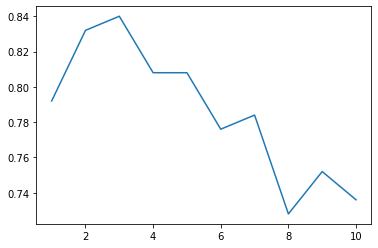

In [22]:
max_depth = np.linspace(1, 10, 10)
accuracy = []
for i in max_depth:
    dt = DecisionTreeClassifier(max_depth = i)
    dt.fit(X_train, y_train)
    scores = dt.score(X_val, y_val)
    accuracy.append(scores)
plt.plot(max_depth, accuracy)

print('The highest accuracy is', max(accuracy))
print('The optimum maximum depth is', max_depth[np.argmax(accuracy)])

c) Train a decision tree classifier using the optimum setting of maximum depth found in 2b on all data from training and validation set. Predict the outcomes on the testing data, and submit your prediction result (0's and 1's) in a .csv file named "YourNetID_dt_prediction.csv". Do not include index and header.

In [23]:
best_max_depth = max_depth[np.argmax(accuracy)]

dt = DecisionTreeClassifier(max_depth = best_max_depth)

dt.fit(X_train, y_train)

X_test = preprocess(test_data, ['Age', 'Fare'])
predictions = dt.predict(X_test)
print(predictions)

pred_surv = pd.DataFrame(predictions)
pred_surv.to_csv('dt_prediction.csv', index=False, header=False)

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]


In [24]:
print(len(pred_surv))
print(len(titanic_test_data))

268
268


## 4. Random Forest Classification

1) Initialize a random forest classifier.(Hint: use `RandomForestClassifier` from scikit-learn)

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_val, y_val)

0.784

2) Optimize your classifier by tuning two hyperparameters to maximize the accuracy of your model: **the maximum depth of the tree**, and **the number of trees** in the random forest classifier. Validate the model by using 10-fold cross-validation on the entire data combining training and validation set (Hint: use `ParameterGrid` and `GridSearchCV` from scikit-learn). Report the optimum parameters you found.

In [27]:
X_train_all = pd.concat([X_train, X_val])
y_train_all = pd.concat([y_train, y_val])

rf = RandomForestClassifier()

parameters = {'max_depth': np.linspace(1, 10, 10).astype('int'),
              'n_estimators': np.linspace(1, 50, 50).astype('int')}

# This takes awhile
clf = GridSearchCV(rf, parameters, cv = 10, scoring = 'accuracy')
clf.fit(X_train_all, y_train_all)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None...
                                              warm_start=False),
             iid='deprecated', n_jobs=None,
  

In [28]:
print('The best parameters after 10-fold cross validation are', clf.best_params_)

The best parameters after 10-fold cross validation are {'max_depth': 8, 'n_estimators': 31}


In [29]:
print(clf.best_score_)

0.8507424475166412


3) Predict the survivals on the testing data using the classifier with the optimum parameters from 2b. Predict the outcomes on titanic_test.csv, and submit your prediction result (0's and 1's) in a .csv file named "YourNetID_rf_prediction.csv". Do not include index and header.

In [30]:
predictions= clf.predict(X_test)
print(predictions)

pred_surv = pd.DataFrame(predictions)
pred_surv.to_csv('rf_prediction.csv', index=False, header=False)

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 0]


## 5. SVM Classification

1) Build SVM classifiers with the following 3 kernels: linear, polynomial with degree = 2, and radial basis function kernel. Train the classifiers and calculate the performance of each classifier on the validation set(Hint: use `SVC` and `Kernel functions` from scikit-learn)

In [34]:
def svm_kernel(x_train, y_train, x_val, y_val, kernel):
    """
    See which SVM classifier based on its kernel performs the best
    
    @param x_train: training data
    @param y_train: training label
    @param x_val: validation data
    @param y_val: validation labels
    @param kernel: svm kernel
    
    Returns classifier
    """
    if kernel == 'poly':
        clf = SVC(kernel = kernel, degree = 2)
        clf.fit(x_train, y_train)
        accuracy = accuracy_score(y_val, clf.predict(x_val))
        print('The validation accuracy for the SVM classifier with a {} kernel is {:.4f}'.format(kernel, accuracy))
        return clf
    else:
        clf = SVC(kernel = kernel)
        clf.fit(x_train, y_train)
        accuracy = accuracy_score(y_val, clf.predict(x_val))
        print('The validation accuracy for the SVM classifier with a {} kernel is {:.4f}'.format(kernel, accuracy))
        return clf

svc_linear = svm_kernel(X_train, y_train, X_val, y_val, kernel = 'linear')
svc_poly = svm_kernel(X_train, y_train, X_val, y_val, kernel = 'poly')
svc_rbf = svm_kernel(X_train, y_train, X_val, y_val, kernel = 'rbf')

The validation accuracy for the SVM classifier with a linear kernel is 0.8560
The validation accuracy for the SVM classifier with a poly kernel is 0.8560
The validation accuracy for the SVM classifier with a rbf kernel is 0.8480


2) Which kernel gives the optimum result? Use your classifier with this kernel to predict the survival outcomes in the testing set. Save your prediction (0's and 1's) in a .csv file named "YourNetID_svm_prediction.csv". Do not include index and header.

The polynomial of degree 2 kernel gave the optimum result.

In [33]:
predictions = svc_poly.predict(X_test)
print(predictions)

pred_surv = pd.DataFrame(predictions)
pred_surv.to_csv('svm_prediction.csv',index=False,header=False)

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]
